In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tracks = pd.read_json("data/tracks.jsonl", lines=True).dropna()


# Corelation of music features

<Axes: >

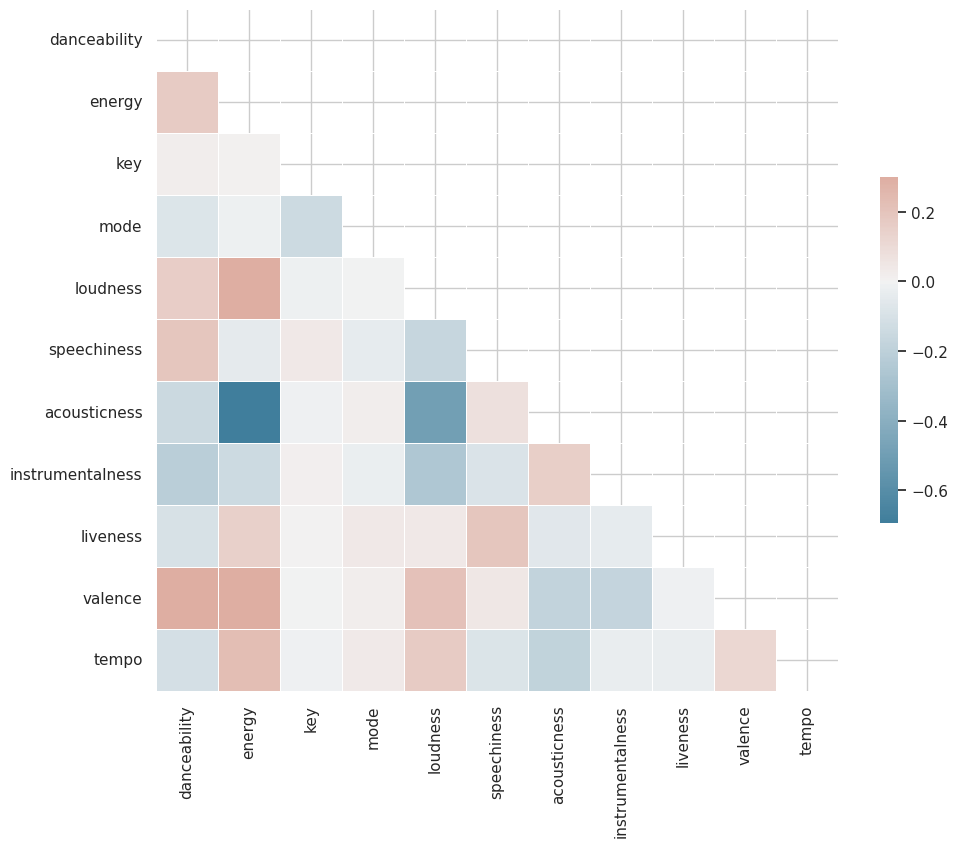

In [10]:
corr = tracks.iloc[:,7:-1].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})